# Image Recognition using OpenCV
 

In [16]:
import cv2
from google.colab.patches import cv2_imshow


Read image 


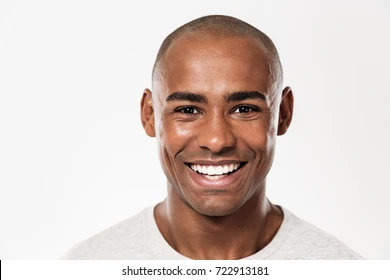

In [17]:
face_cascade =cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
img =cv2.imread("/content/human pic.webp")
cv2_imshow(img)

Change Colored Picture into Gray Style.

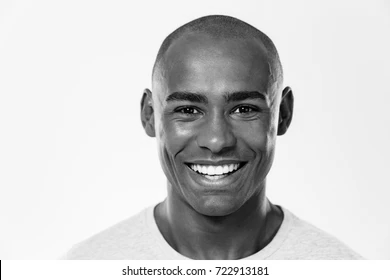

In [18]:
gray =cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
cv2_imshow(gray)

In [19]:
faces = face_cascade.detectMultiScale(gray)

print(faces)

[[149  53 139 139]]


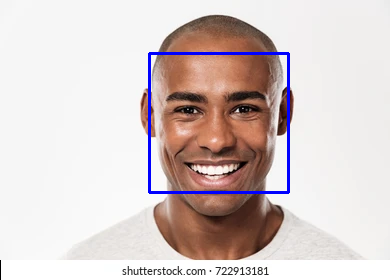

In [20]:

for (x,y,w,h) in faces:
  cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # display the output
  cv2_imshow(img)

Now we detect Eyes of Person.


[[166  90  43  43]
 [220  93  37  37]]


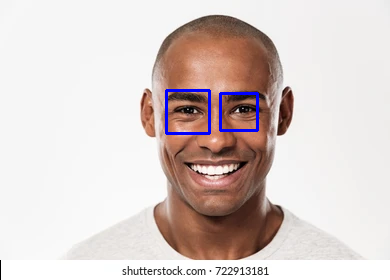

In [21]:
eye_cascade = cv2.CascadeClassifier('/content/haarcascade_eye.xml')
img = cv2.imread("/content/human pic.webp")
gray =cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
eyes =eye_cascade.detectMultiScale(gray)
print(eyes)
for (x,y,w,h) in eyes:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    # display output
cv2_imshow(img)

Detect using function call.

In [22]:
def fun_to_detect(img_path): 
 face_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
 img = cv2.imread(img_path)
 gray =cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
 faces =face_cascade.detectMultiScale(gray)
 for (x,y,w,h) in faces:
   cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
   # display the output
   cv2_imshow(img)

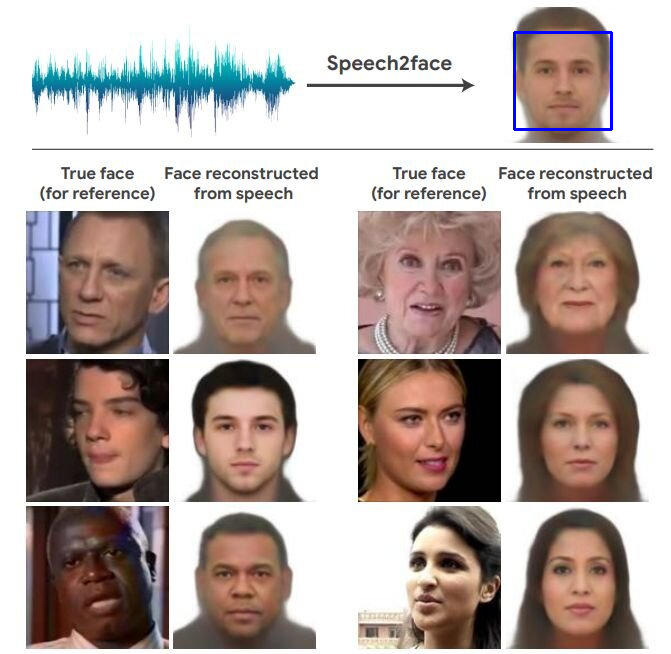

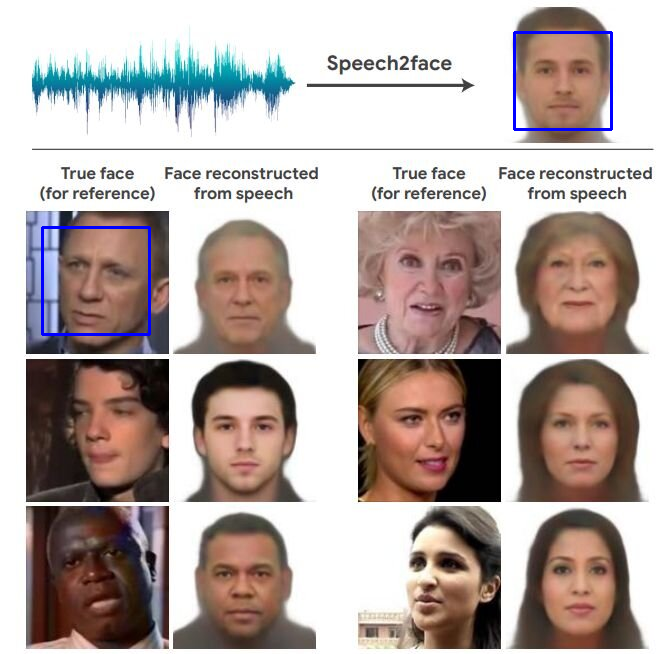

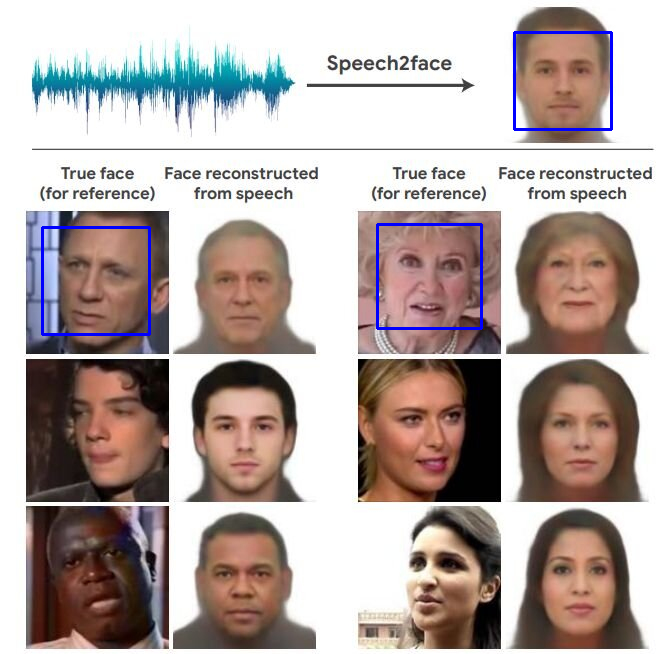

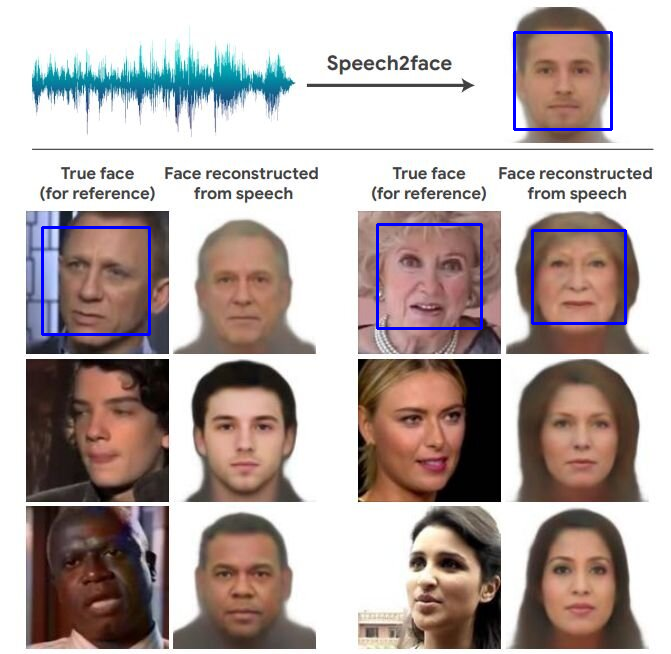

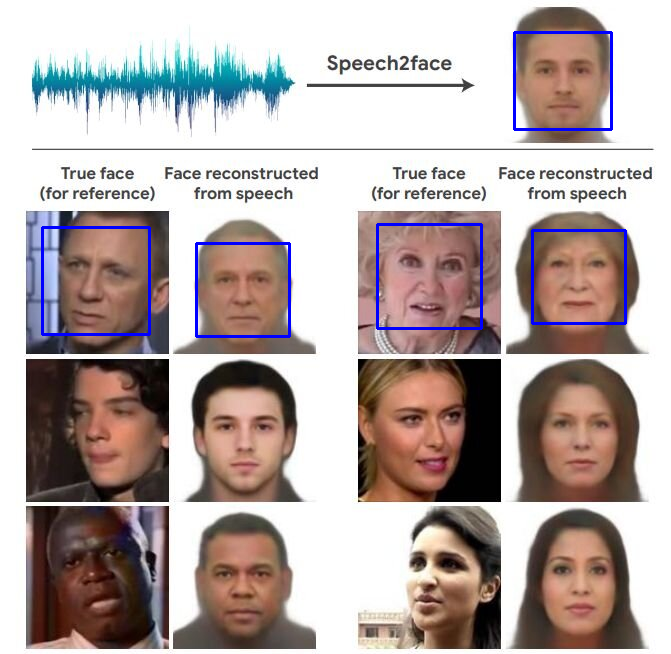

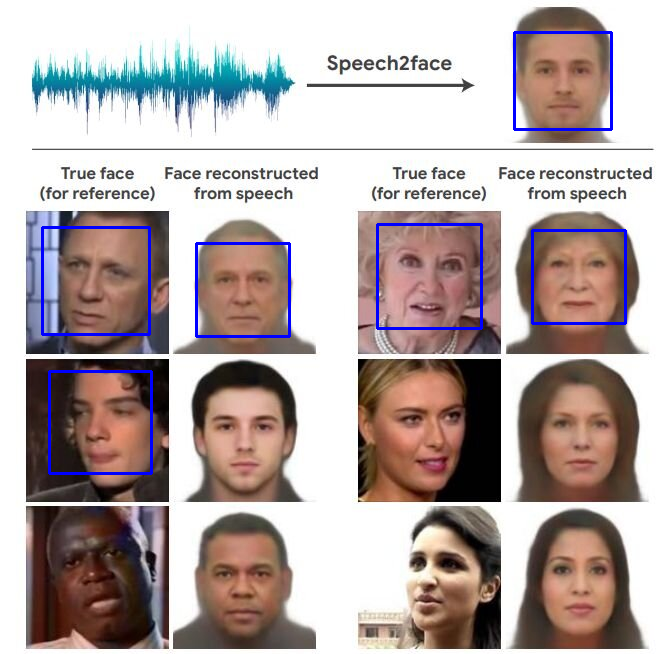

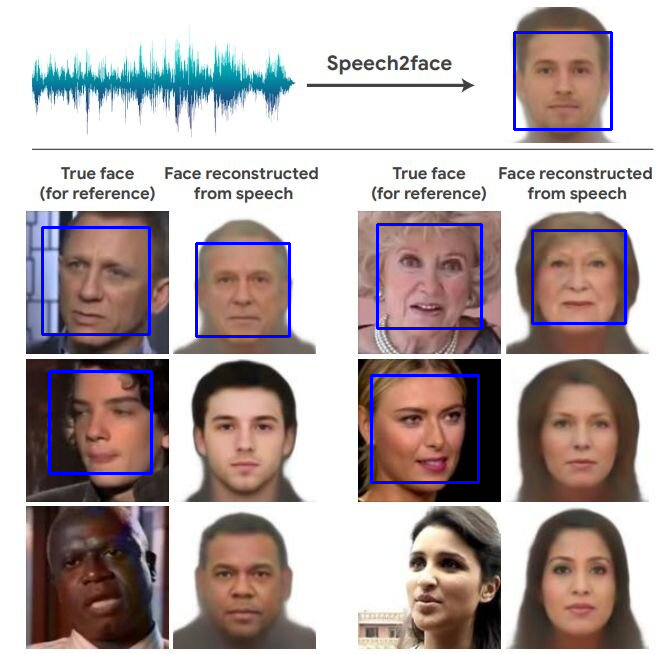

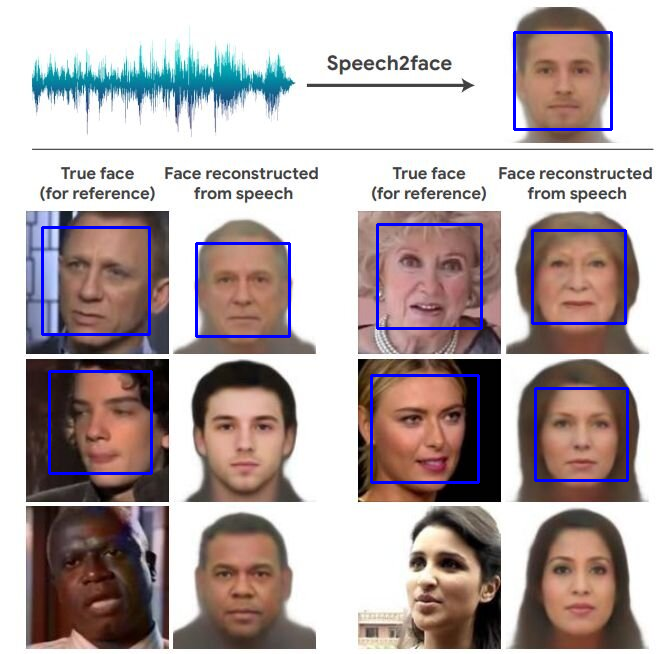

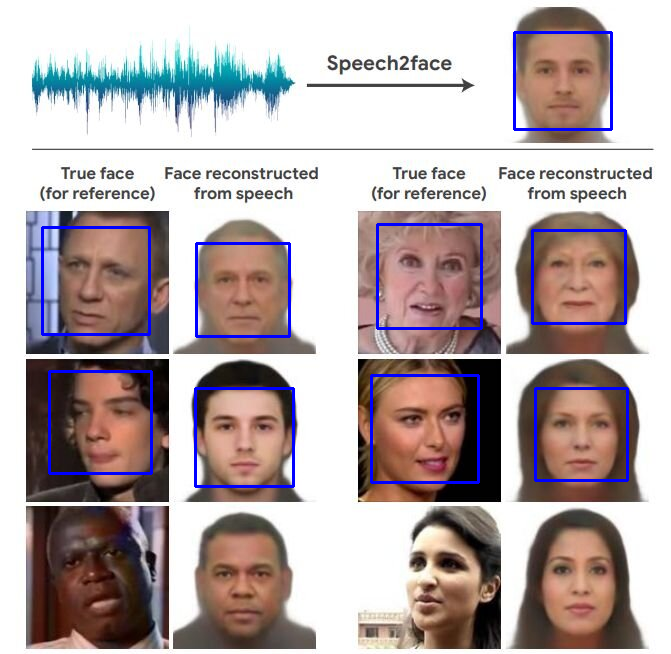

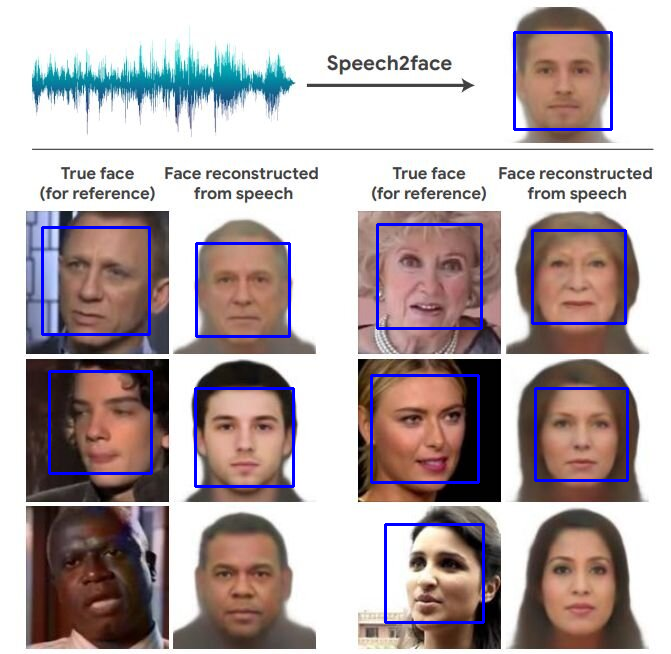

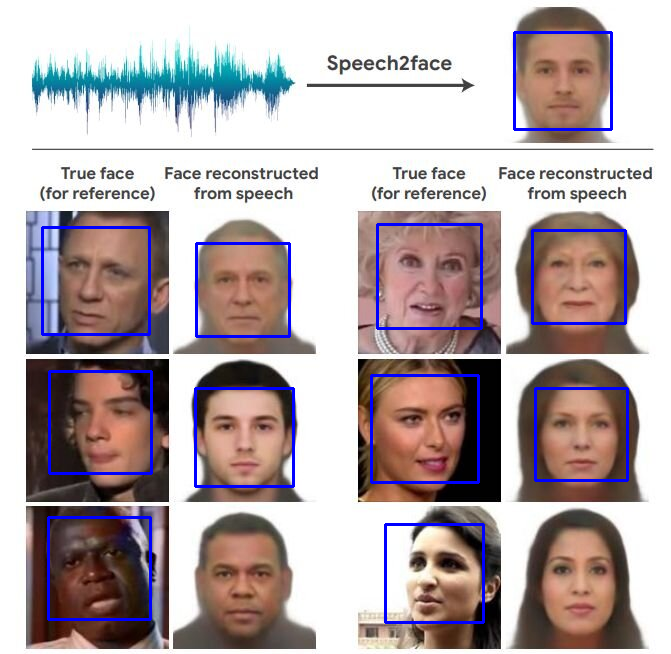

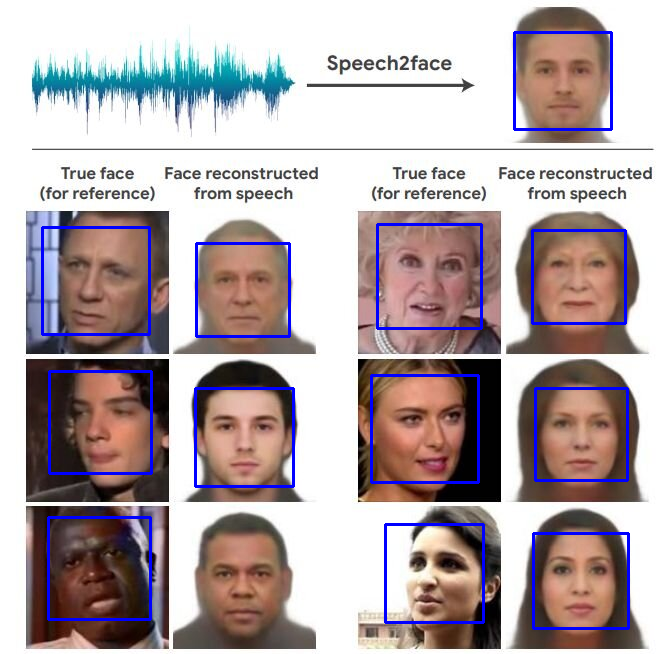

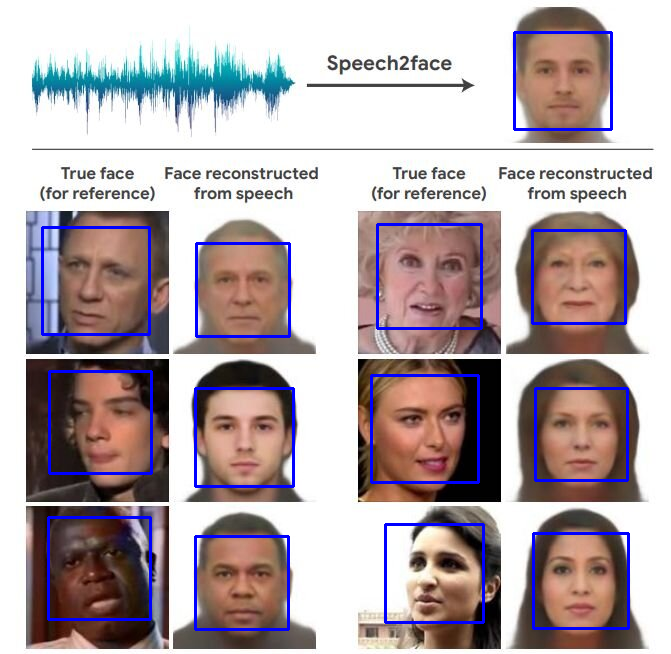

In [23]:
img_path="/content/5d020eb457ae2.jpg"


fun_to_detect(img_path)

**Detect Your Face By Running Two Snippets and Capture your photo. **

In [24]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:

from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

**Run to Detect your face **

In [ ]:
face_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
img = cv2.imread("/content/photo.jpg")
gray =cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
faces =face_cascade.detectMultiScale(gray)
for (x,y,w,h) in faces:
  cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # display the output
  cv2_imshow(img)

THANK YOU!!